# Data Visualization and Statistics for the UJI Probe Dataset

This package contains an anonymized packets of 802.11 probe requests captured throughout March of 2023 at Universitat Jaume I. The packet capture file is in the standardized *.pcap binary format and can be opened with any packet analysis tool such as Wireshark or scapy (Python packet analysis and manipulation package).

The dataset is usable for analyzis of Wi-Fi probe requests, presence detection, occupancy estimation or signal stability analyzis.

[Download](https://zenodo.org/records/7801798)

## Libraries and Configurations

Import configuration files

In [1]:
from configparser import ConfigParser

config = ConfigParser()
config.read("../../config.ini")

['../../config.ini']

Import **data libraries**

In [2]:
import pandas as pd

Import **other libraries**

In [3]:
from rich.progress import Progress
from rich import traceback

traceback.install()

<bound method InteractiveShell.excepthook of <ipykernel.zmqshell.ZMQInteractiveShell object at 0x10914ce50>>

Custom helper scripts

In [4]:
%cd ../../
from scripts import plotHelper, encodingHelper
%cd data_exploration_cleaning/uji_dataset

/Users/bacci/Library/CloudStorage/SynologyDrive-giovanni/Research 🌱/Repositories/COMPACT/notebooks
/Users/bacci/Library/CloudStorage/SynologyDrive-giovanni/Research 🌱/Repositories/COMPACT/notebooks/data_exploration_cleaning/uji_dataset


## Import Data

In [5]:
# Combined dataframe
uji_df_csv = config["DEFAULT"]["interim_path"] + "/uji_dataset/encoded_LABEL_uji_df.csv"

In [6]:
uji_df = pd.read_csv(uji_df_csv, index_col=0)
uji_df["Timestamp"] = pd.to_datetime(uji_df["Timestamp"])

## Statistics

In [7]:
print("Number of unique MAC Addresses", uji_df["MAC Address"].nunique())

Number of unique MAC Addresses 129330


### Information Elements

In [8]:
print("Number of unique HT Capabilities:", uji_df["HT Capabilities"].nunique())

Number of unique HT Capabilities: 209


In [9]:
print("Number of unique VHT Capabilities:", uji_df["VHT Capabilities"].nunique())

Number of unique VHT Capabilities: 55


In [10]:
print("Number of unique HE Capabilities:", uji_df["HE Capabilities"].nunique())

Number of unique HE Capabilities: 162


In [11]:
print("Number of unique Supported Rates:", uji_df["Supported Rates"].nunique())

Number of unique Supported Rates: 23


In [12]:
print(
    "Number of unique Extended Supported Rates",
    uji_df["Extended Supported Rates"].nunique(),
)

Number of unique Extended Supported Rates 13


## SSID Field

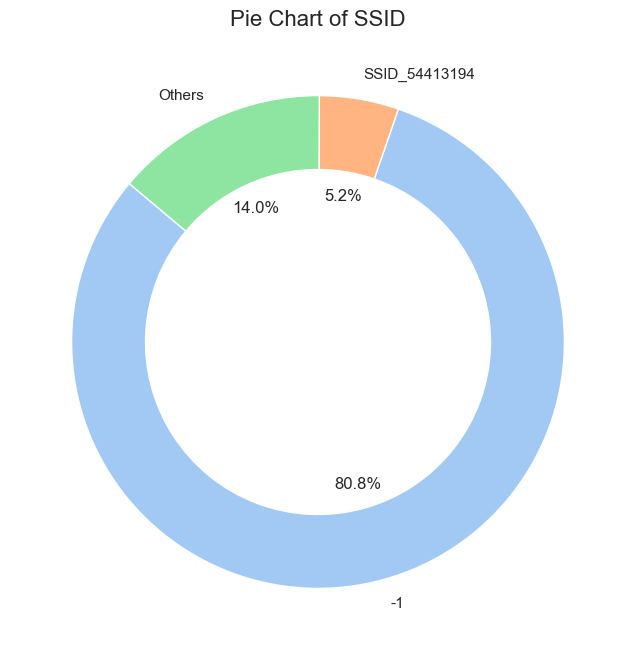

In [13]:
plotHelper.plot_pie_chart(uji_df, "SSID")

Since the `SSID` field is empty most of the time, we drop the column

In [14]:
uji_df.drop(columns=["SSID"], inplace=True)

In [15]:
uji_df

,Timestamp,MAC Address,Channel,DS Channel,HT Capabilities,Extended Capabilities,Vendor Specific Tags,Supported Rates,Extended Supported Rates,VHT Capabilities,HE Capabilities,Length,Length NO SSID
0,2023-02-28 10:06:13.608247995,16:d2:8e:2a:d5:47,6,5.0,63,39,9,1,0,-1,-1,145,132
1,2023-02-28 10:06:13.619611979,16:d2:8e:2a:d5:47,6,5.0,63,39,9,1,0,-1,-1,145,132
2,2023-02-28 10:06:15.874474049,aa:a2:d1:e3:8c:22,6,6.0,63,39,9,1,0,-1,-1,145,132
3,2023-02-28 10:06:17.232656956,86:6f:da:1b:96:4b,9,8.0,59,171,174,2,6,-1,-1,107,107
4,2023-02-28 10:06:17.326913118,60:83:34:df:f8:74,10,9.0,35,-1,138,1,0,-1,-1,109,96
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1410829,2023-03-29 10:36:00.696099997,c6:6f:dd:56:6d:7e,11,10.0,186,63,218,1,0,35,40,163,150
1410830,2023-03-29 10:36:00.717555046,c6:6f:dd:56:6d:7e,11,10.0,186,63,218,1,0,35,20,150,150
1410831,2023-03-29 10:36:00.722501040,c6:6f:dd:56:6d:7e,11,10.0,186,63,218,1,0,35,19,163,150
1410832,2023-03-29 10:36:03.044989109,ce:1c:b2:ac:5c:9c,2,1.0,159,144,220,1,0,40,139,168,168


In [16]:
dataset_probes_total = uji_df.shape[0]

## 

Dropping rows having a locally administered `MAC Address`: the 2nd digit of locally assigned MAC address in hexadecimal format has only four options: **2** (0010), **6** (0110), **A** (1010) or **E** (1110).

In [17]:
uji_non_random = uji_df.loc[
    ~uji_df["MAC Address"].str[1].isin(["2", "6", "a", "e"]), :
].copy()

Number of non-randomized Probe Requests

In [18]:
dataset_probes_non_random = uji_non_random.shape[0]

In [19]:
print(
    "Percentage of non-random MAC Addresses:",
    round((dataset_probes_non_random / dataset_probes_total) * 100, 2),
    "%",
)

Percentage of non-random MAC Addresses: 65.07 %


In [20]:
print(
    "Number of unique NON randomized MAC Addresses:",
    uji_non_random["MAC Address"].nunique(),
)

Number of unique NON randomized MAC Addresses: 2437


In [21]:
print(
    "Average number of probes per unique MAC Address:",
    round(uji_non_random.groupby("MAC Address").size().mean(), 2),
)

Average number of probes per unique MAC Address: 376.71


Number of unique `Length NO SSID`

In [22]:
print(
    "Number of unique Length NO SSID parameter:",
    uji_non_random["Length NO SSID"].nunique(),
)

Number of unique Length NO SSID parameter: 115


### Plot Feature Correlation

In [23]:
to_drop = ["Timestamp", "MAC Address"]
uji_non_random.drop(columns=to_drop, inplace=True)

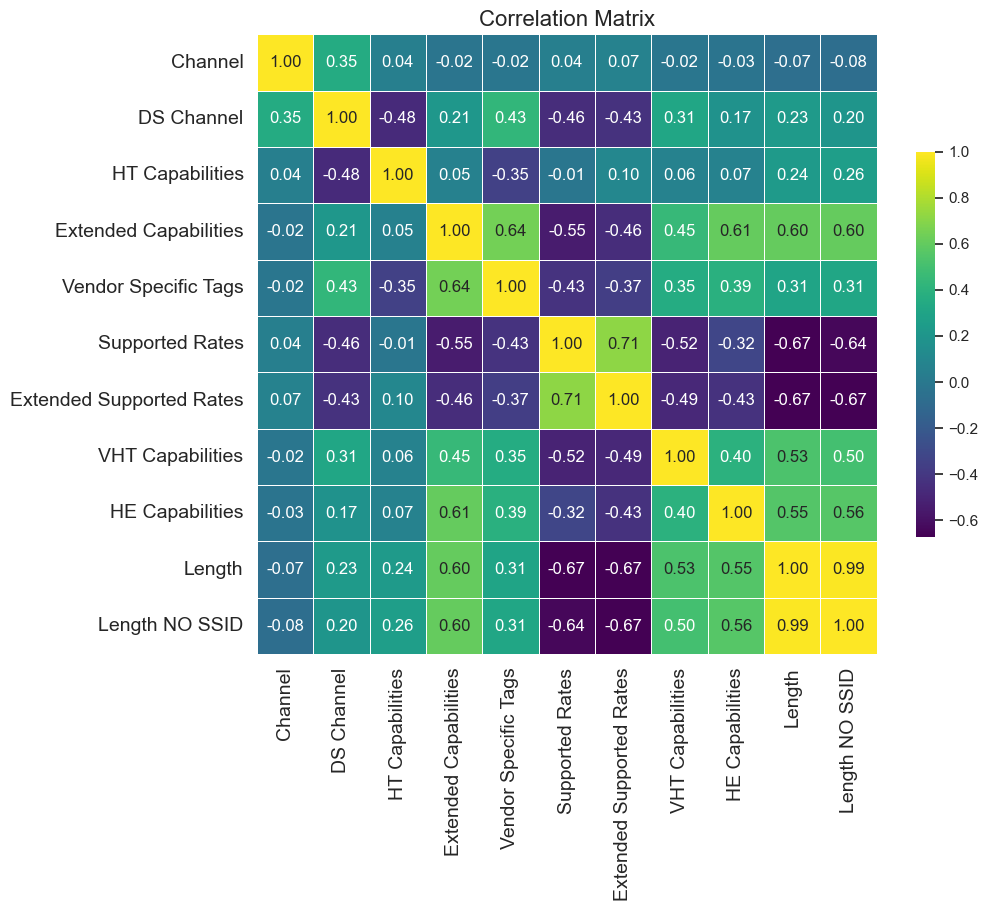

In [25]:
plotHelper.plot_correlation_matrix(uji_df)